# Predict Ratings of Movies

- Original data: https://www.kaggle.com/danielgrijalvas/movies

There are 15 attributes for each movie in the dataset.:
- budget: the budget of a movie. Some movies don't have this, so it appears as 0

- company: the production company

- country: country of origin

- director: the director

- genre: main genre of the movie.

- gross: revenue of the movie

- name: name of the movie

- rating: rating of the movie (R, PG, etc.)

- released: release date (YYYY-MM-DD)

- runtime: duration of the movie

- score: IMDb user rating

- votes: number of user votes

- star: main actor/actress

- writer: writer of the movie

- year: year of release

In [2]:
# import libraries used
import numpy as np
import pandas as pd

In [3]:
# load movie dataset
movie = pd.read_csv('movies.csv')
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movie.shape

(7668, 15)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data Pre-processing

In [6]:
# fill all the missing numeric values with fillna()
movie.fillna(movie.mean(numeric_only=True), inplace=True)

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
movie.genre.value_counts()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

In [9]:
movie.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [10]:
genre_new = pd.get_dummies(movie['genre'])
movienew = pd.concat([movie, genre_new], axis=1)

In [11]:
movienew.head()

,name,rating,genre,year,released,score,votes,director,writer,star,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,False,False,False,False,False,False,False,False,False,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,False,False,False,False,False,False,False,False,False,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,False,False,False,False,False,False,False,False,False,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,False,False,False,False,False,False,False,False,False,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,False,False,False,False,False,False,False,False,False,False


# Linear Regression

In [12]:
# specify the independent variables X and target variable y
numeric_X = movienew[['votes','budget','runtime']]
category_X = movienew[['Comedy', 'Action', 'Drama', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Fantasy', 'Mystery', 'Thriller', 'Family',
       'Sci-Fi', 'Romance', 'Western','Musical','Music','History']]
y = movienew['score']

In [13]:
y.describe()

count    7668.000000
mean        6.390411
std         0.968652
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [14]:
numeric_X.describe()

,votes,budget,runtime
count,7.668000e+03,7.668000e+03,7668.000000
mean,8.810850e+04,3.558988e+07,107.261613
std,1.632918e+05,3.510036e+07,18.576400
min,7.000000e+00,3.000000e+03,55.000000
25%,9.100000e+03,1.400000e+07,95.000000
50%,3.300000e+04,3.558988e+07,104.000000
75%,9.300000e+04,3.558988e+07,116.000000
max,2.400000e+06,3.560000e+08,366.000000


In [15]:
# apply normalization on all numeric attributes: (X-mean)/Std
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
numeric_X = pd.DataFrame(scaler.fit_transform(numeric_X), columns = numeric_X.columns)

In [16]:
numeric_X.describe()

,votes,budget,runtime
count,7.668000e+03,7.668000e+03,7.668000e+03
mean,5.930456e-17,7.413070e-17,7.413070e-18
std,1.000065e+00,1.000065e+00,1.000065e+00
min,-5.395693e-01,-1.013927e+00,-2.813517e+00
25%,-4.838801e-01,-6.151299e-01,-6.601070e-01
50%,-3.375068e-01,0.000000e+00,-1.755898e-01
75%,2.995750e-02,0.000000e+00,4.704333e-01
max,1.415896e+01,9.128994e+00,1.392925e+01


In [17]:
Xnew = pd.concat([numeric_X, category_X], axis=1)

In [18]:
Xnew.head()

,votes,budget,runtime,Comedy,Action,Drama,Crime,Biography,Adventure,Animation,...,Fantasy,Mystery,Thriller,Family,Sci-Fi,Romance,Western,Musical,Music,History
0,5.137712,-0.472672,2.085491,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.141526,-0.885800,-0.175590,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,6.809674,-0.501164,0.901115,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.813881,-0.914292,-1.036954,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.121824,-0.843063,-0.498601,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# import train_test split
from sklearn.model_selection import train_test_split
# split data into train and test, 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2, 
                                                    random_state = 20)

In [20]:
# import linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [21]:
# define model to be linear regression
# https://scikit-learn.org/stable/modules/generated/
    # sklearn.linear_model.LinearRegression.html
linear_reg = LinearRegression()

In [22]:
# train model using training dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
# show the intercept of the trained model (Theta_0)
linear_reg.intercept_

6.318235493551817

In [24]:
linear_reg.coef_

array([ 3.93682346e-01, -1.76854029e-01,  2.90591757e-01, -1.82765474e-03,
       -1.86536701e-01,  2.96897914e-01,  2.23227967e-01,  4.74718219e-01,
       -1.08853518e-02,  7.93924849e-01, -4.12780098e-01, -2.04874861e-01,
       -1.38981046e-01, -5.67774596e-02,  2.16020236e-01, -3.12845628e-02,
       -5.81215386e-02, -1.83316222e-01,  1.35265817e+00,  9.12919335e-01,
        2.83389298e+00])

In [25]:
# show the coefficients of independent variables
coeff_df = pd.DataFrame(linear_reg.coef_, Xnew.columns, columns=['Coefficient'])
coeff_df

,Coefficient
votes,0.393682
budget,-0.176854
runtime,0.290592
Comedy,-0.001828
Action,-0.186537
Drama,0.296898
Crime,0.223228
Biography,0.474718
Adventure,-0.010885
Animation,0.793925


In [26]:
linear_reg.score(X_test, y_test, sample_weight=None)

0.3597285329174841

# Logistic Regression

In [27]:
movienew['score'].describe()

count    7668.000000
mean        6.390411
std         0.968652
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [28]:
# create new column 'Prefer'
    # define Prefer as movies that rate 50% higher by consumers, among all movies
movienew.loc[movienew['score'] >= 6.5, 'Prefer'] = 1
movienew.loc[movienew['score'] < 6.5, 'Prefer'] = 0

In [29]:
movienew.head()

,name,rating,genre,year,released,score,votes,director,writer,star,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western,Prefer
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,False,False,False,False,False,False,False,False,False,1.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,False,False,False,False,False,False,False,False,False,0.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,False,False,False,False,False,False,False,False,False,1.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,False,False,False,False,False,False,False,False,False,1.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,False,False,False,False,False,False,False,False,False,1.0


In [30]:
# assign features and target variable
X2 = Xnew # normalized features
y2 = movienew['Prefer'] # binary target

In [31]:
y2.value_counts()

Prefer
1.0    3861
0.0    3807
Name: count, dtype: int64

In [32]:
# change target column to array, change the shape of y to a contiguous flattened array 
# (from n X 1 to 1 X n)
y2 = y2.ravel()

C:\Users\David\AppData\Local\Temp\ipykernel_14468\2615278575.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y2 = y2.ravel()


In [34]:
# import train_test split
from sklearn.model_selection import train_test_split
# split data into train and test, 80% in training and 20% in testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, 
                                                        random_state = 20)

In [35]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [36]:
# define model to be logistic regression
# https://scikit-learn.org/stable/modules/generated/
    # sklearn.linear_model.LogisticRegression.html

lr = LogisticRegression()

In [37]:
# train model using training dataset
lr.fit(X_train2, y_train2)

LogisticRegression()

In [38]:
# show the intercept of the trained model (Theta_0)
lr.intercept_

array([0.32543795])

In [40]:
# show the coefficients of independent variables
lr.coef_

array([[ 2.03029355, -0.72899595,  0.74539314, -0.1912888 , -0.79816818,
         0.58937157,  0.28322879,  1.43312313, -0.12889373,  1.74160209,
        -1.42554823, -0.7010131 , -0.69665934,  0.18624132, -0.11311206,
        -0.89213766, -0.1100484 , -0.5302992 ,  0.46528869,  0.42182144,
         0.71271164]])

In [41]:
# show the coefficients of independent variables
# apply flatten() to convert the 1Xn array back to nX1 array

coeff_df = pd.DataFrame(lr.coef_.flatten(), X2.columns, columns=['Coefficient'])
coeff_df

,Coefficient
votes,2.030294
budget,-0.728996
runtime,0.745393
Comedy,-0.191289
Action,-0.798168
Drama,0.589372
Crime,0.283229
Biography,1.433123
Adventure,-0.128894
Animation,1.741602


In [42]:
# import evaluation function from sklearn
from sklearn.metrics import accuracy_score

y_pred2 = lr.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.7222946544980443


## ROC Curve

In [43]:
# get probabilities of each prediction

proba_y = lr.predict_proba(X_test2)
proba_y

array([[7.33539534e-01, 2.66460466e-01],
       [5.36766066e-01, 4.63233934e-01],
       [1.76698944e-09, 9.99999998e-01],
       ...,
       [8.41515223e-01, 1.58484777e-01],
       [3.52972974e-01, 6.47027026e-01],
       [7.85464879e-01, 2.14535121e-01]])

In [44]:
# get the column of probabilities being 1 (high-level rating by customers)

proba_y_1 = proba_y[:,1]
proba_y_1

array([0.26646047, 0.46323393, 1.        , ..., 0.15848478, 0.64702703,
       0.21453512])

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [46]:
# get fpr, tpr, and thresholds

fpr, tpr, thresholds = metrics.roc_curve(y_test2, proba_y_1, pos_label=1)

In [47]:
# help(roc_curve)

In [48]:
fpr

array([0.        , 0.        , 0.        , 0.00132626, 0.00132626,
       0.00397878, 0.00397878, 0.00530504, 0.00530504, 0.0066313 ,
       0.0066313 , 0.00795756, 0.00795756, 0.00928382, 0.00928382,
       0.01061008, 0.01061008, 0.0132626 , 0.0132626 , 0.01458886,
       0.01458886, 0.01724138, 0.01724138, 0.01856764, 0.01856764,
       0.0198939 , 0.0198939 , 0.02122016, 0.02122016, 0.02254642,
       0.02254642, 0.02387268, 0.02387268, 0.02519894, 0.02519894,
       0.02785146, 0.02785146, 0.02917772, 0.02917772, 0.03050398,
       0.03050398, 0.03448276, 0.03448276, 0.03580902, 0.03580902,
       0.03846154, 0.03846154, 0.0397878 , 0.0397878 , 0.04111406,
       0.04111406, 0.04244032, 0.04244032, 0.04376658, 0.04376658,
       0.04509284, 0.04509284, 0.04774536, 0.04774536, 0.04907162,
       0.04907162, 0.05039788, 0.05039788, 0.0530504 , 0.0530504 ,
       0.05437666, 0.05437666, 0.05570292, 0.05570292, 0.05702918,
       0.05702918, 0.0596817 , 0.0596817 , 0.06100796, 0.06100

In [49]:
tpr

array([0.        , 0.00128205, 0.22051282, 0.22051282, 0.22435897,
       0.22435897, 0.22948718, 0.22948718, 0.26153846, 0.26153846,
       0.26410256, 0.26410256, 0.28589744, 0.28589744, 0.31282051,
       0.31282051, 0.31666667, 0.31666667, 0.34487179, 0.34487179,
       0.3474359 , 0.3474359 , 0.35769231, 0.35769231, 0.37307692,
       0.37307692, 0.37564103, 0.37564103, 0.37820513, 0.37820513,
       0.38717949, 0.38717949, 0.39102564, 0.39102564, 0.39230769,
       0.39230769, 0.39615385, 0.39615385, 0.3974359 , 0.3974359 ,
       0.39871795, 0.39871795, 0.4       , 0.4       , 0.41282051,
       0.41282051, 0.41794872, 0.41794872, 0.42307692, 0.42307692,
       0.42435897, 0.42435897, 0.42564103, 0.42564103, 0.42820513,
       0.42820513, 0.42948718, 0.42948718, 0.43076923, 0.43076923,
       0.43461538, 0.43461538, 0.43717949, 0.43717949, 0.43974359,
       0.43974359, 0.44102564, 0.44102564, 0.44358974, 0.44358974,
       0.44615385, 0.44615385, 0.4474359 , 0.4474359 , 0.45   

In [50]:
thresholds

array([       inf, 1.        , 0.89991145, 0.89885349, 0.897439  ,
       0.89568804, 0.89335326, 0.89227329, 0.86600141, 0.86378087,
       0.86286509, 0.86229687, 0.8485043 , 0.84611997, 0.82960097,
       0.82714208, 0.82363323, 0.82254054, 0.80758537, 0.80694337,
       0.80414649, 0.801529  , 0.79228231, 0.79120867, 0.78262614,
       0.78011773, 0.77851853, 0.77847227, 0.7774786 , 0.77658682,
       0.77201679, 0.77151999, 0.76925979, 0.76921114, 0.76825251,
       0.76555664, 0.76382583, 0.76344843, 0.76172848, 0.76145541,
       0.76137946, 0.75704042, 0.75685294, 0.75656136, 0.74855529,
       0.74822325, 0.74434223, 0.7430996 , 0.73995536, 0.73965761,
       0.73884146, 0.7382042 , 0.73777727, 0.73693336, 0.73490429,
       0.7348984 , 0.73475922, 0.73254162, 0.73145151, 0.72976176,
       0.7251239 , 0.72099567, 0.71800717, 0.71757578, 0.71709924,
       0.71683863, 0.71629136, 0.71604998, 0.71501082, 0.71401698,
       0.7128829 , 0.70977876, 0.70946234, 0.709214  , 0.70717

In [51]:
# plot roc curve

import matplotlib as mpl
import matplotlib.pyplot as plt

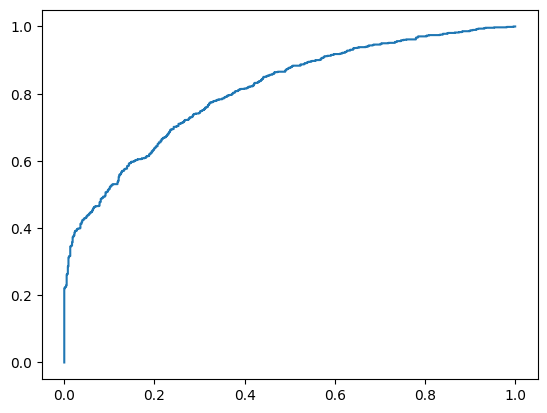

In [52]:
plt.plot(fpr,tpr)
plt.show()

In [53]:
# auc (area under ROC curve)
metrics.auc(fpr, tpr)

0.8097454601101814